## **Graduate Rotational Internship Program: The Sparks Foundation**
## **Sunny Sanjivkumar Khade**<br>
## **Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters**
##  **and represent it visually.**<br>
## **Unsupervised Machine Learning : K-Means Clustering (Using Python Scikit-Learn)**

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [2]:
data = pd.read_csv(r"E:\Sparks Internship Tasks\TASK 2\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop('Id', axis=1, inplace=True)  #Removing the 'Id' column
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the data

In [5]:
data.shape    #Number of rows and columns

(150, 5)

In [6]:
data.describe()    #Summary of the statistics 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()    #To check if null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.corr()    #We can observe the corelation between variables 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


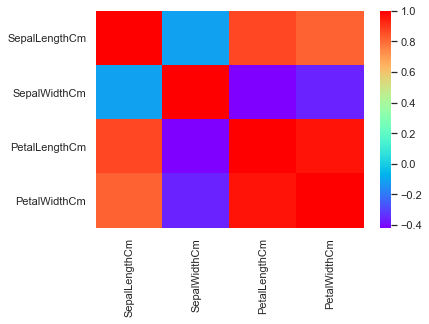

In [12]:
correlation = sns.heatmap(data.corr(), cmap='rainbow')    #Visualizing the correlation 

### Finding the optimum number of clusters 

In [13]:
x = data.iloc[:,[0,1,2,3]].values
wcss=[]  # Within cluser sum of squares 

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986]

### Plotting the Elbow curve to find the number of clusters 

<function matplotlib.pyplot.show(*args, **kw)>

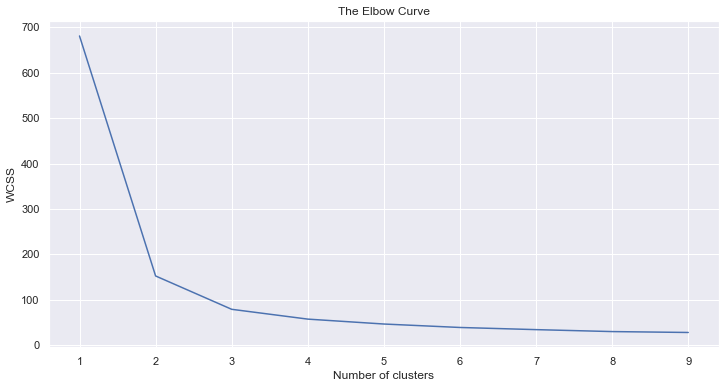

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

### From the above Eblow Curve we can observe that 3 clusters will be the optimum number of clusters

### Training the model

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = kmeans.fit_predict(x)

### Visualizing the trained set

### Visualising the clusters on the first two columns ie. Sepal Length and Sepal Width

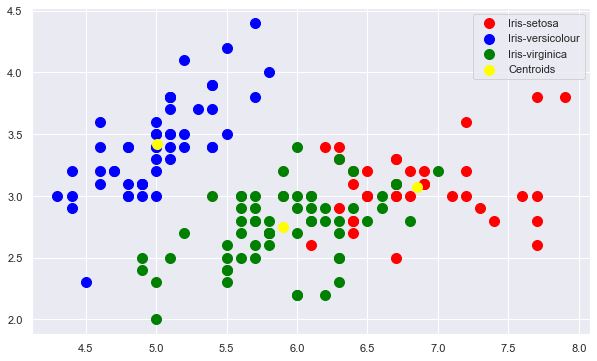

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

### Visualising the clusters on the last two columns ie. Petal Length and Petal Width

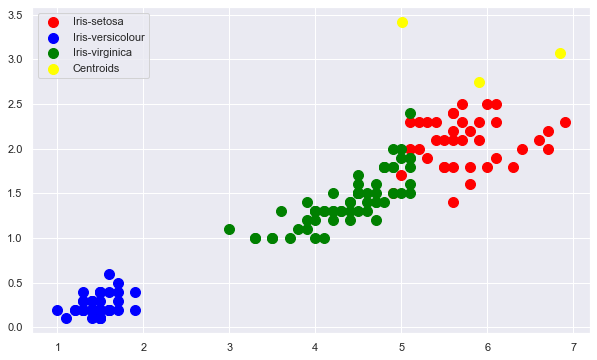

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x[y == 0, 2], x[y == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 2], x[y == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()